In [1]:
import csv
import os
import time
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#### Loading the data

In [2]:
df = pd.read_csv("Training.csv")

#### First view of the data

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
X = df.drop(columns=['prognosis', 'Unnamed: 133'])
y = df['prognosis']

infos_data = {
    'Column': [],
    'Null Value Found': [],
    'Values': [],
    'Type': [],
    'Min' : [],
    'Max' : [],
    'Mean' : [],
    'Std' : [],
    'Median' : []
}

for c in X.columns:
    infos_data['Column'].append(c)
    infos_data['Null Value Found'].append(X[c].isnull().any())
    infos_data['Values'].append(list(X[c].dropna().unique()))
    infos_data['Type'].append(X[c].dtype)
    infos_data['Min'].append(min(X[c]))
    infos_data['Max'].append(max(X[c]))
    infos_data['Mean'].append(statistics.mean(list(X[c])))
    infos_data['Std'].append(statistics.pstdev(list(X[c])))
    infos_data['Median'].append(statistics.median(list(X[c])))

infos_df = pd.DataFrame(infos_data)

pd.set_option('display.max_rows', None)

print(infos_df)

                             Column  Null Value Found  Values   Type  Min  \
0                           itching             False  [1, 0]  int64    0   
1                         skin_rash             False  [1, 0]  int64    0   
2              nodal_skin_eruptions             False  [1, 0]  int64    0   
3               continuous_sneezing             False  [0, 1]  int64    0   
4                         shivering             False  [0, 1]  int64    0   
5                            chills             False  [0, 1]  int64    0   
6                        joint_pain             False  [0, 1]  int64    0   
7                      stomach_pain             False  [0, 1]  int64    0   
8                           acidity             False  [0, 1]  int64    0   
9                  ulcers_on_tongue             False  [0, 1]  int64    0   
10                   muscle_wasting             False  [0, 1]  int64    0   
11                         vomiting             False  [0, 1]  int64    0   

In [5]:
unique_diseases = list(np.unique(y))
print(f'Distinct diseases: {len(unique_diseases)}\n')
print(unique_diseases)

Distinct diseases: 41

['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes ', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']


#### Vizualisation

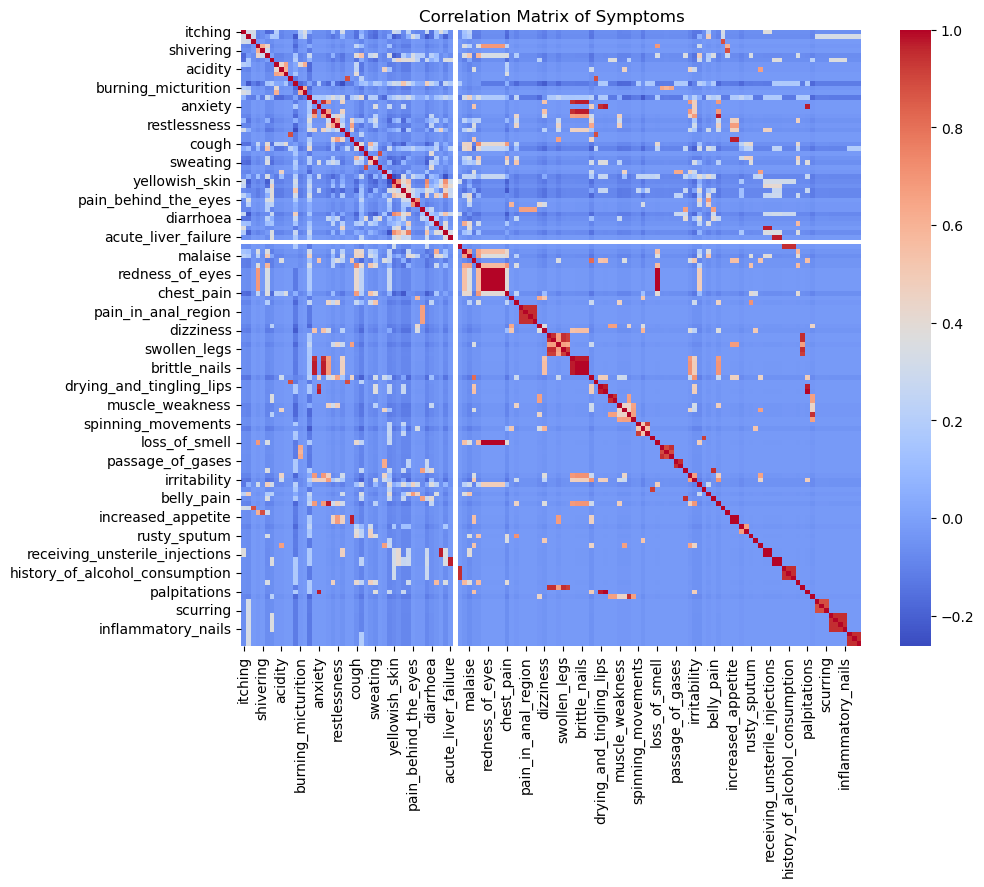

In [6]:
symptoms = X.columns

corr = df[symptoms].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Symptoms')
plt.show()

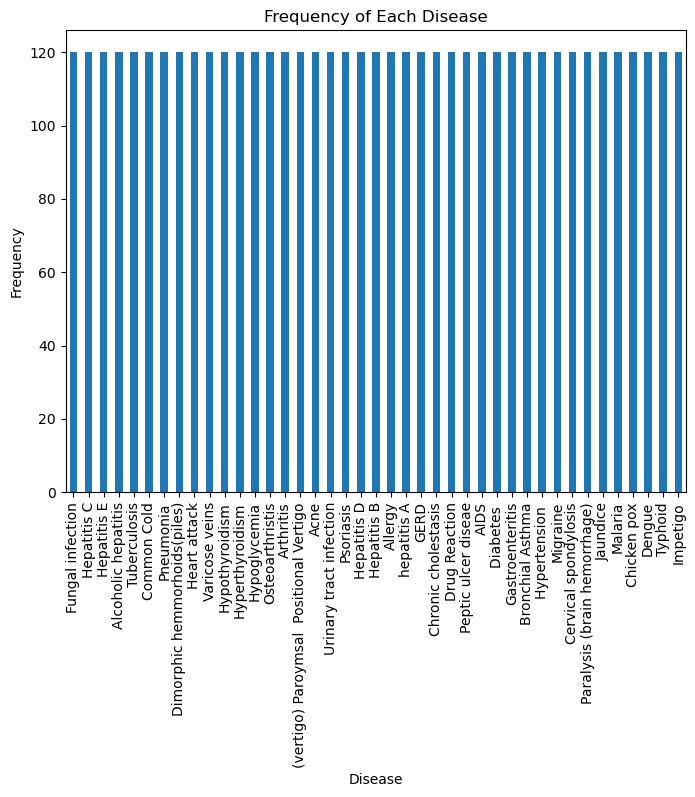

In [7]:
disease_counts = y.value_counts()

plt.figure(figsize=(8, 6))
disease_counts.plot(kind='bar')
plt.title('Frequency of Each Disease')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

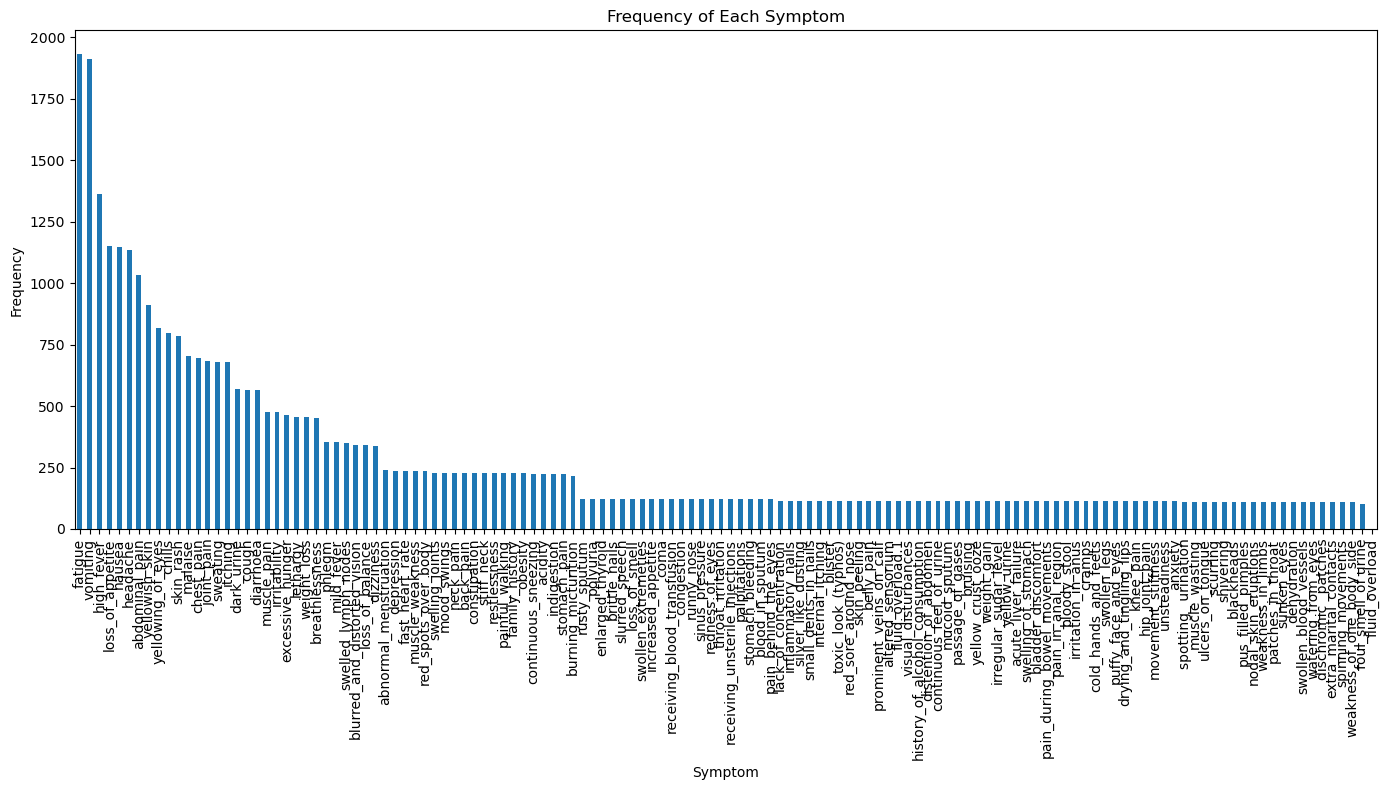

In [8]:
symptom_frequencies = X.sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
symptom_frequencies.plot(kind='bar')
plt.title('Frequency of Each Symptom')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Models

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[15 15 15 ... 38 35 27]


In [10]:
X, y = np.array(X), np.array(y)

In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=100, random_state=42)

rforest.fit(X, y)

RandomForestClassifier(random_state=42)

In [13]:
# SVM
from sklearn.svm import SVC

svm = SVC()

svm.fit(X, y)

SVC()

In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

KNeighborsClassifier()

#### Testing

In [15]:
df_test = pd.read_csv("../Testing.csv")

In [16]:
y_test = np.array(df_test['prognosis'])
X_test = np.array(df_test.drop(columns=['prognosis']))

In [17]:
y_test = encoder.transform(y_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluation(clf, X_test, y_test, clf_name):
    
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Results for {clf_name}:')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


Results for Decision Tree:
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.0

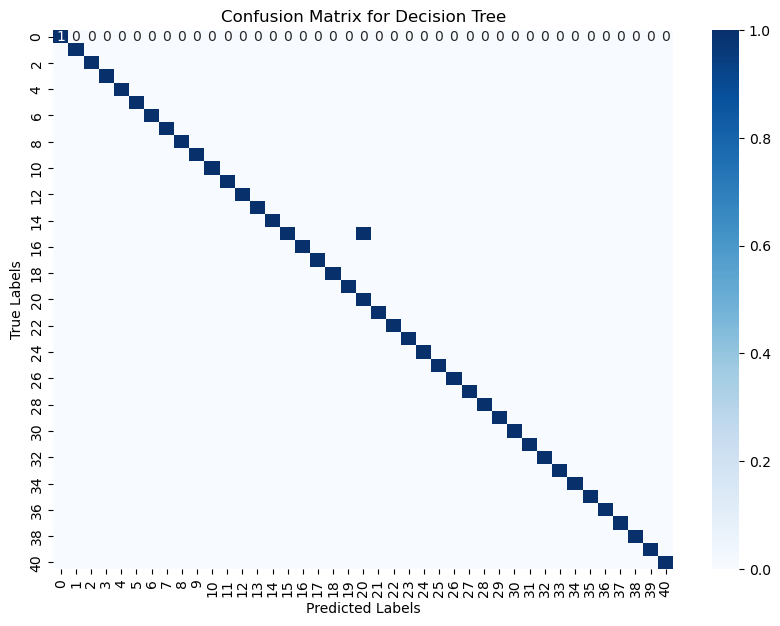

Results for Random Forest:
Accuracy: 0.9761904761904762
Precision: 0.9880952380952381
Recall: 0.9761904761904762
F1 Score: 0.9761904761904762

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.0

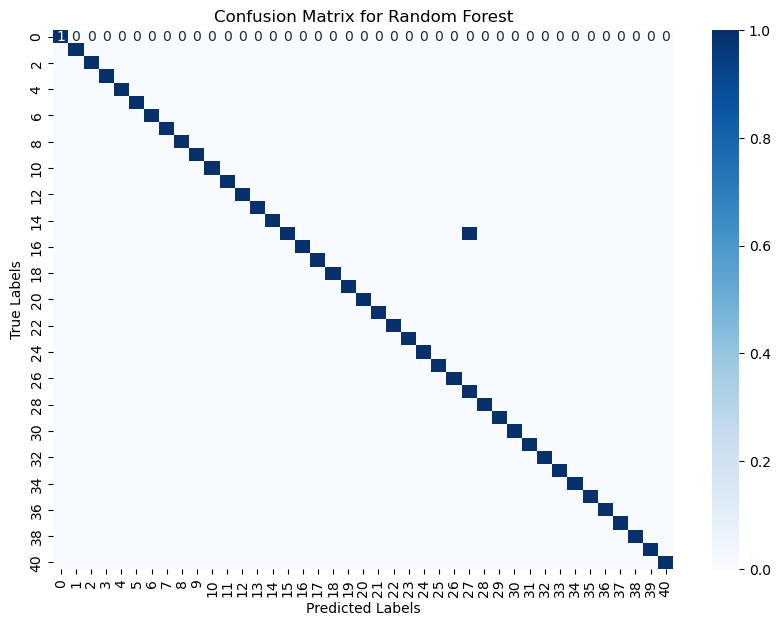

Results for Support Vector Machine:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       

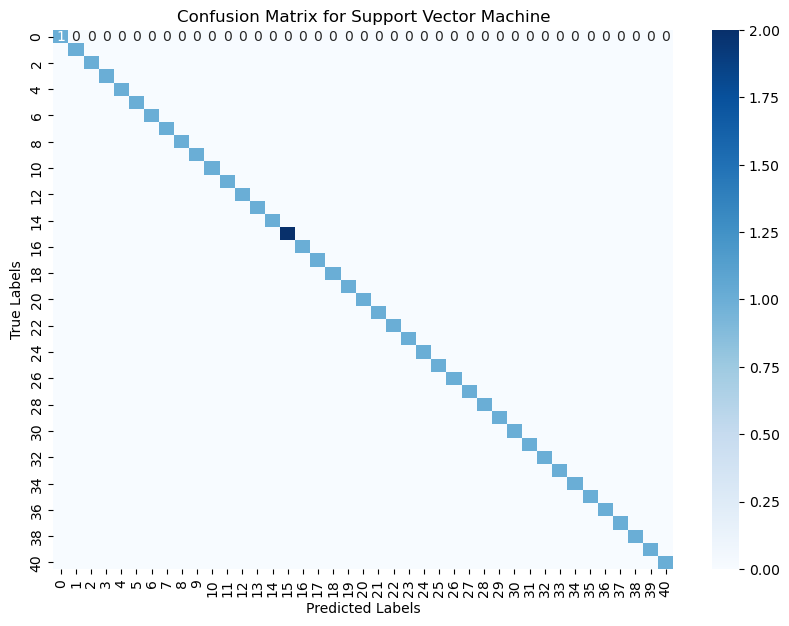

Results for K-Nearest Neighbors:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.0

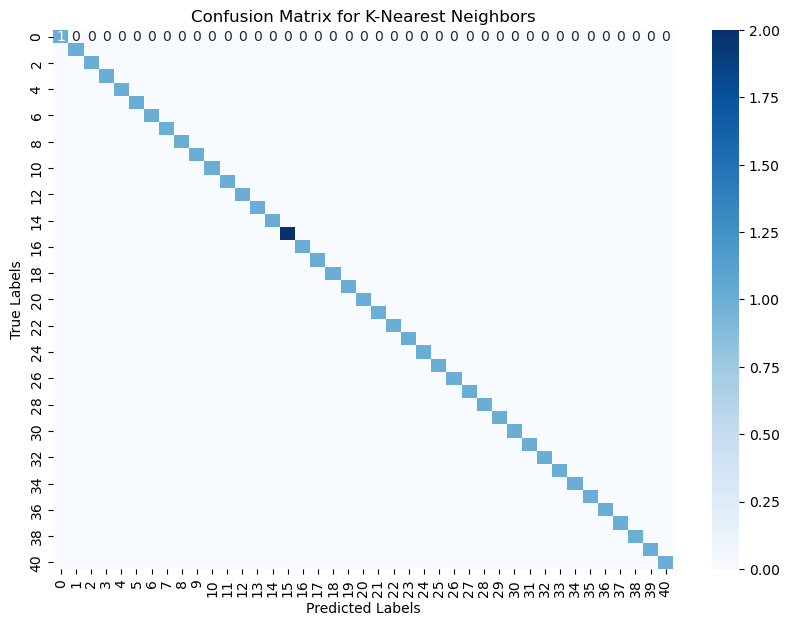

In [19]:
evaluation(dtree, X_test, y_test, clf_name="Decision Tree")
evaluation(rforest, X_test, y_test, clf_name="Random Forest")
evaluation(svm, X_test, y_test, clf_name="Support Vector Machine")
evaluation(knn, X_test, y_test, clf_name="K-Nearest Neighbors")

#### RandomForest Parameters Optimization

In [20]:
from sklearn.model_selection import GridSearchCV

# parameters = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15, 20, 25, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 4],
#     'bootstrap': [True, False]
# }

parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest_clf, param_grid=parameters, verbose=2, scoring='accuracy')

start_time = time.time()

grid_search.fit(X, y)

end_time = time.time()
total_time = end_time - start_time
minutes = int(total_time // 60)
seconds = int(total_time % 60)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_s

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; 

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=10, n_estimators=200; to

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total tim

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total tim

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total tim

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.3s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=100; 

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, 

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estim

In [21]:
print(f"Runtime: {minutes} minutes {seconds} seconds")

Runtime: 8 minutes 32 seconds


In [22]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy of the best model:", test_accuracy)
print(f'Best params: {best_rf}')

Test accuracy of the best model: 0.9761904761904762
Best params: RandomForestClassifier(max_depth=10)
